In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
div.container{width:80% !important;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
span.toc-item-num{display:none;}
div.CodeMirror {font-family:Consolas}
div.input {font-family:Consolas}
</style>
"""))

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential  # 모델 객체 생성 시 필요
from tensorflow.keras.layers import Dense, Input       # 모델 layer 쌓을 때 필요
import matplotlib.pyplot as plt

In [5]:
# 1. dataset
x_data = np.array([[0, 0],  # inputdata : 독립변수
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_data = np.array([[0],     # outputdata : 종속변수
                   [1],
                   [1],
                   [0]])

# 2. 모델 구성
model = Sequential()
# model.add(Input(shape=2))
model.add(Dense(units=10,                         # units=10 : 출력층
                input_shape=(2,),                 # input_dim=2, : 2차원  # 입력2 출력10
                activation='relu'))               # 1개의 층
model.add(Dense(units=20, activation='relu'))     # 은닉층(hidden layer)에서는 input_shape, input_dim 입력 X(자동으로 가져옴)  # 입력10 출력20
model.add(Dense(units=10, activation='relu'))     # 입력20 출력10
model.add(Dense(units=1,  activation='sigmoid'))  # 입력10 출력1  # 2진분류(logistic regression) : 0과 1사이의 값으로 예측
print(model.summary())
# Param input2 units10 3*10  = 30
#      input10 units20 11*20 = 220
#      input20 units10 21*10 = 210
#       input10 units1 11*1  = 11

# 3. 모델 학습과정 설정
# model.compile(loss='mse', optimizer='adam', metrics=['mae'])  # 회귀식에서 학습과정 설정 시
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='binary_accuracy')  # 2진분류
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')  # 다중분류

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                30        
                                                                 
 dense_9 (Dense)             (None, 20)                220       
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
# 4. 학습하기
hist = model.fit(x_data, y_data, epochs=100, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.7046 - binary_accuracy: 0.5000 - 764ms/epoch - 764ms/step
Epoch 2/100
1/1 - 0s - loss: 0.7017 - binary_accuracy: 0.2500 - 3ms/epoch - 3ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6987 - binary_accuracy: 0.2500 - 7ms/epoch - 7ms/step
Epoch 4/100
1/1 - 0s - loss: 0.6957 - binary_accuracy: 0.2500 - 2ms/epoch - 2ms/step
Epoch 5/100
1/1 - 0s - loss: 0.6930 - binary_accuracy: 0.2500 - 3ms/epoch - 3ms/step
Epoch 6/100
1/1 - 0s - loss: 0.6904 - binary_accuracy: 0.2500 - 3ms/epoch - 3ms/step
Epoch 7/100
1/1 - 0s - loss: 0.6879 - binary_accuracy: 0.2500 - 3ms/epoch - 3ms/step
Epoch 8/100
1/1 - 0s - loss: 0.6859 - binary_accuracy: 0.2500 - 0s/epoch - 0s/step
Epoch 9/100
1/1 - 0s - loss: 0.6838 - binary_accuracy: 0.2500 - 3ms/epoch - 3ms/step
Epoch 10/100
1/1 - 0s - loss: 0.6817 - binary_accuracy: 0.5000 - 0s/epoch - 0s/step
Epoch 11/100
1/1 - 0s - loss: 0.6797 - binary_accuracy: 0.5000 - 10ms/epoch - 10ms/step
Epoch 12/100
1/1 - 0s - loss: 0.6777 - binary_accuracy: 0.500

Epoch 97/100
1/1 - 0s - loss: 0.4979 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 98/100
1/1 - 0s - loss: 0.4950 - binary_accuracy: 1.0000 - 0s/epoch - 0s/step
Epoch 99/100
1/1 - 0s - loss: 0.4919 - binary_accuracy: 1.0000 - 11ms/epoch - 11ms/step
Epoch 100/100
1/1 - 0s - loss: 0.4889 - binary_accuracy: 1.0000 - 4ms/epoch - 4ms/step


In [9]:
# 5. 학습과정 보기 및 평가
hist.history         # 딕셔너리
hist.history.keys()  # 3. metrics='binary accuracy' 값이 들어옴

dict_keys(['loss', 'binary_accuracy'])

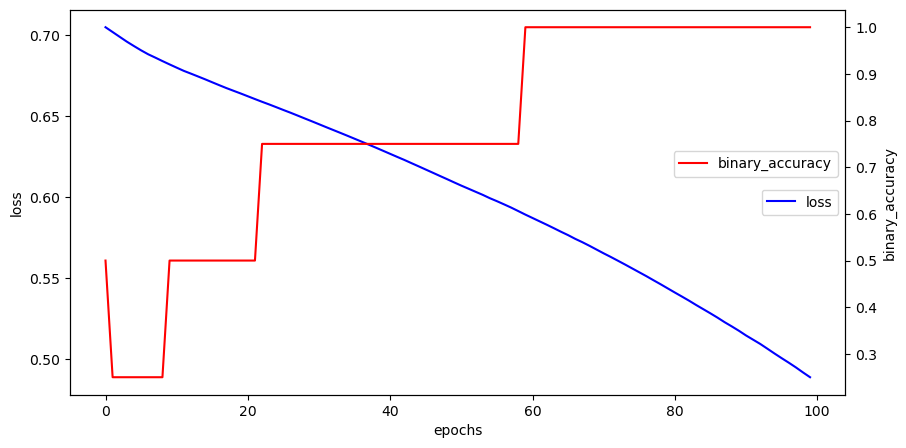

In [16]:
fig, loss_ax = plt.subplots(figsize=(10, 5))
loss_ax.plot(hist.history['loss'], 'b', label='loss')
acc_ax = loss_ax.twinx()  # loss_ax축과 x축을 공유하는 acc_ax
acc_ax.plot(hist.history['binary_accuracy'], 'r', label='binary_accuracy')

loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('binary_accuracy')

loss_ax.legend(loc='center right')    # loss
acc_ax.legend(bbox_to_anchor=(0.999, 0.65))  # binary_accuracy  # 좌하 0, 0 / 우상 1, 1

plt.show()

In [18]:
# 6. 모델 평가하기
score = model.evaluate(x_data, y_data)
print('loss : ', score[0])
print('accuracy : ', score[1])

1/1 [==============================] - 0s 22ms/step - loss: 0.4859 - binary_accuracy: 1.0000
loss :  0.48588523268699646
accuracy :  1.0


In [25]:
# 7. 예측
int(model.predict(np.array([[0, 1]])).round())  # 0.5보다 큰 값이면 1로 봄

1/1 [==============================] - 0s 33ms/step


1

In [32]:
6 in [1, 2, 3, 4, 5]  # 데이터가 포함되어 있는 요소인지 여부를 return

False

In [35]:
# list에 0과 1만 들어있는지 여부
temp = [0, 1, 2]
print(all([x in (0, 1) for x in temp]))
print(all(x in (0, 1) for x in temp))  # all()을 사용 시 리스트컴프리헨션을 풀어서 사용 가능

False
False


In [42]:
# 독립변수 2개(0 0, 0 1, 1 0 , 1 1)를 입력받아 예측값을 출력 (종료:수를 1개만 입력할 때)
while True:
    input_str = input('space로 분리해서 0 또는 1을 2개 입력하세요. (한 개만 입력 시 종료됩니다.)')
                      # string으로 받기 때문에 공백제거(strip():space가 1개 이상일 수도 있으므로), split() 후 int로 형변환(형변환 할 문자가 1개일 경우 종료)
    # '0  1'  =>  '0  1'  => '0', '1'
    input_list = input_str.strip().split()
    input_nums = list(map(int, input_list))  # [0, 1]
    if len(input_nums) == 1:
        print('데이터를 하나만 입력할 경우 종료됩니다.')
        break
    if all(x in [0, 1] for x in input_nums):  # 0과 1만 입력한 경우
        # input_data = np.array([input_nums[0], input_nums[1]])
        # input_data = np.array([input_nums[:2]])
        input_data = np.array(input_nums[:2]).reshape(-1, 2)  # 1행2열
        print('입력값 : ', input_nums[0], input_nums[1])
        print('예측값 : ', int(model.predict(input_data).round()))
    else:
        print('0과 1만 입력행 예측값을 볼 수 있습니다. 다시 입력하세요.')

space로 분리해서 0 또는 1을 2개 입력하세요. (한 개만 입력 시 종료됩니다.)1 0
입력값 :  1 0
1/1 [==============================] - 0s 22ms/step
예측값 :  1
space로 분리해서 0 또는 1을 2개 입력하세요. (한 개만 입력 시 종료됩니다.)0 1
입력값 :  0 1
1/1 [==============================] - 0s 18ms/step
예측값 :  1
space로 분리해서 0 또는 1을 2개 입력하세요. (한 개만 입력 시 종료됩니다.)0
데이터를 하나만 입력할 경우 종료됩니다.


# 2. AND

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 10)                30        
                                                                 
 dense_73 (Dense)            (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
1/1 - 0s - loss: 0.7904 - binary_accuracy: 0.5000 - 466ms/epoch - 466ms/step
Epoch 2/200
1/1 - 0s - loss: 0.7884 - binary_accuracy: 0.5000 - 3ms/epoch - 3ms/step
Epoch 3/200
1/1 - 0s - loss: 0.7863 - binary_accuracy: 0.5000 - 3ms/epoch - 3ms/step
Epoch 4/200
1/1 - 0s - loss: 0.7843 - binary_accuracy: 0.5000 - 3ms/epoch - 3ms/step
Epoch 5/200
1/1 - 0s - loss: 0.7823 - binary_accuracy: 0.5000 - 3ms/epoch - 3ms/step
Epoch 6/200
1/1 - 0

Epoch 89/200
1/1 - 0s - loss: 0.6519 - binary_accuracy: 0.7500 - 9ms/epoch - 9ms/step
Epoch 90/200
1/1 - 0s - loss: 0.6506 - binary_accuracy: 0.7500 - 3ms/epoch - 3ms/step
Epoch 91/200
1/1 - 0s - loss: 0.6492 - binary_accuracy: 0.7500 - 0s/epoch - 0s/step
Epoch 92/200
1/1 - 0s - loss: 0.6478 - binary_accuracy: 0.7500 - 10ms/epoch - 10ms/step
Epoch 93/200
1/1 - 0s - loss: 0.6465 - binary_accuracy: 0.7500 - 2ms/epoch - 2ms/step
Epoch 94/200
1/1 - 0s - loss: 0.6451 - binary_accuracy: 0.7500 - 0s/epoch - 0s/step
Epoch 95/200
1/1 - 0s - loss: 0.6437 - binary_accuracy: 0.7500 - 12ms/epoch - 12ms/step
Epoch 96/200
1/1 - 0s - loss: 0.6424 - binary_accuracy: 0.7500 - 2ms/epoch - 2ms/step
Epoch 97/200
1/1 - 0s - loss: 0.6410 - binary_accuracy: 0.7500 - 0s/epoch - 0s/step
Epoch 98/200
1/1 - 0s - loss: 0.6396 - binary_accuracy: 0.7500 - 0s/epoch - 0s/step
Epoch 99/200
1/1 - 0s - loss: 0.6383 - binary_accuracy: 0.7500 - 3ms/epoch - 3ms/step
Epoch 100/200
1/1 - 0s - loss: 0.6369 - binary_accuracy: 0

1/1 - 0s - loss: 0.5210 - binary_accuracy: 1.0000 - 0s/epoch - 0s/step
Epoch 185/200
1/1 - 0s - loss: 0.5196 - binary_accuracy: 1.0000 - 3ms/epoch - 3ms/step
Epoch 186/200
1/1 - 0s - loss: 0.5183 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 187/200
1/1 - 0s - loss: 0.5169 - binary_accuracy: 1.0000 - 0s/epoch - 0s/step
Epoch 188/200
1/1 - 0s - loss: 0.5155 - binary_accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 189/200
1/1 - 0s - loss: 0.5142 - binary_accuracy: 1.0000 - 0s/epoch - 0s/step
Epoch 190/200
1/1 - 0s - loss: 0.5128 - binary_accuracy: 1.0000 - 0s/epoch - 0s/step
Epoch 191/200
1/1 - 0s - loss: 0.5114 - binary_accuracy: 1.0000 - 12ms/epoch - 12ms/step
Epoch 192/200
1/1 - 0s - loss: 0.5100 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 193/200
1/1 - 0s - loss: 0.5087 - binary_accuracy: 1.0000 - 0s/epoch - 0s/step
Epoch 194/200
1/1 - 0s - loss: 0.5073 - binary_accuracy: 1.0000 - 0s/epoch - 0s/step
Epoch 195/200
1/1 - 0s - loss: 0.5061 - binary_accuracy: 1.0000 -

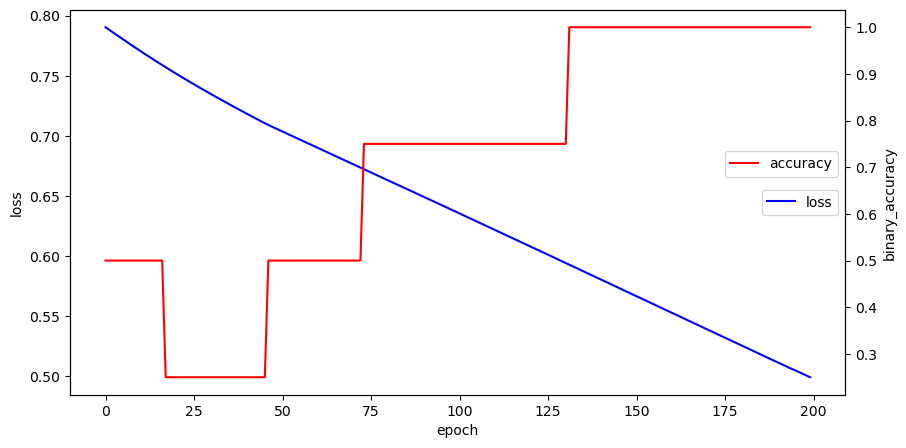

1/1 [==============================] - 0s 125ms/step - loss: 0.4979 - binary_accuracy: 1.0000
loss :  0.49794936180114746
accuracy :  1.0
1/1 [==============================] - 0s 62ms/step


0

In [92]:
# 1. dataset
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0],
              [0],
              [0],
              [1]])

# 2. 모델 구성
model = Sequential()
model.add(Input(shape=2))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1,  activation='sigmoid'))
print(model.summary())

# 3. 모델 학습과정 설정 (2진분류)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

# 4. 학습하기
hist = model.fit(x, y, epochs=200, verbose=2)

# 5. 학습과정 보기 및 평가 (eve)
hist.history.keys()
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'b', label='loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax
acc_ax.plot(hist.history['binary_accuracy'], 'r', label='accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('binary_accuracy')

loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.65))
plt.show()

score = model.evaluate(x, y)
print('loss : ', score[0])
print('accuracy : ', score[1])

# 6. 예측하기 : np.array([[0, 1]])를 예측하기
int(model.predict(np.array([[0, 1]])))
# int(model.predict(np.array([[0, 1]])) >= 0.5)

In [95]:
print(int(model.predict(np.array([[1, 1]])).round()))

1/1 [==============================] - 0s 22ms/step
1
